## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [10]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [11]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [12]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [14]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2274.686313,0.162147
std,24.559481,30.090047,2267.710756,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,389.700000,0.000000
50%,29.000000,70.350000,1389.350000,0.000000
75%,55.000000,89.850000,3778.525000,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [15]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [16]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [17]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [18]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [19]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [20]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [21]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [22]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [23]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = telecom['TotalCharges'].astype('float')

In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [25]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [26]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2274.686313
std,24.559481,30.090047,0.368612,2267.710756
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,389.700000
50%,29.000000,70.350000,0.000000,1389.350000
75%,55.000000,89.850000,0.000000,3778.525000
90%,69.000000,102.600000,1.000000,5969.930000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [27]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [28]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [29]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [30]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [35]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.352920,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.051796,-0.375533,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1
5334,0.673024,1,1,1.437668,1.331196,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.006794,0.777787,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
6578,-0.914247,1,0,0.298268,-0.699293,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1


In [39]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

In [40]:
(telecom['Churn'].mean())*100

26.536987079369588

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [42]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

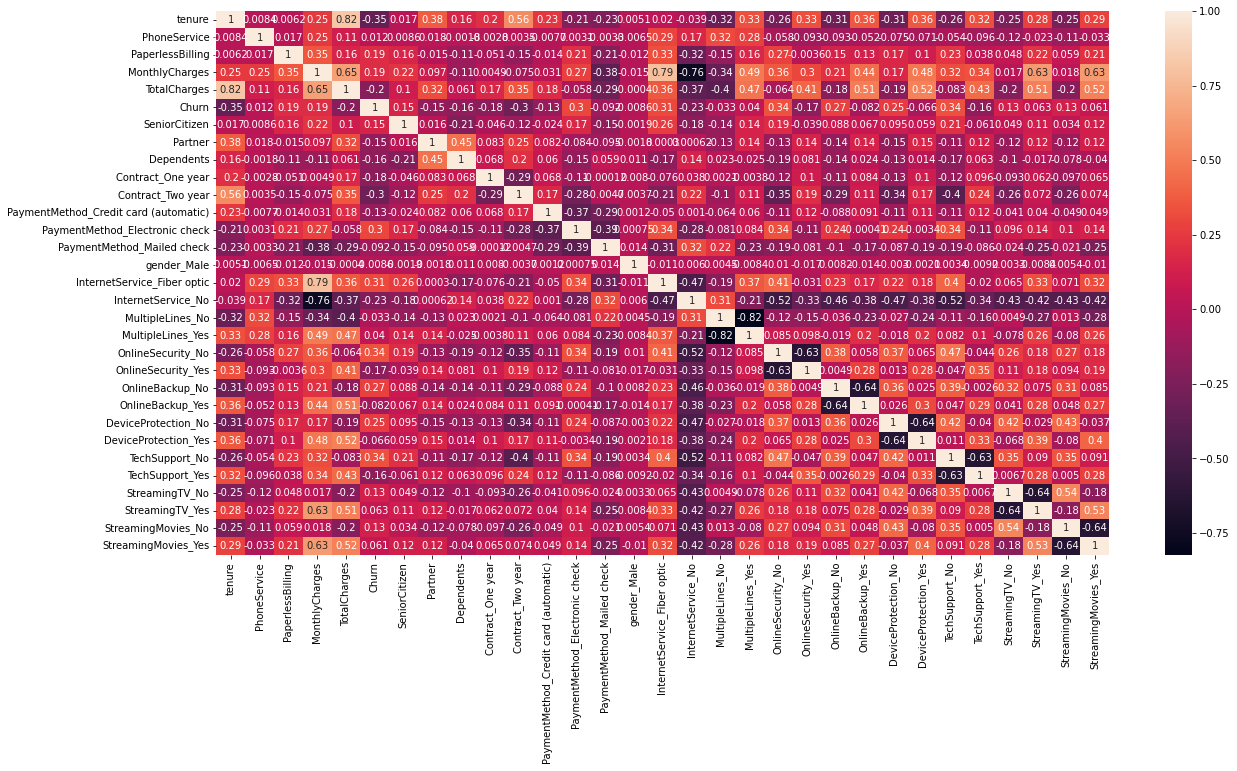

In [43]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [44]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

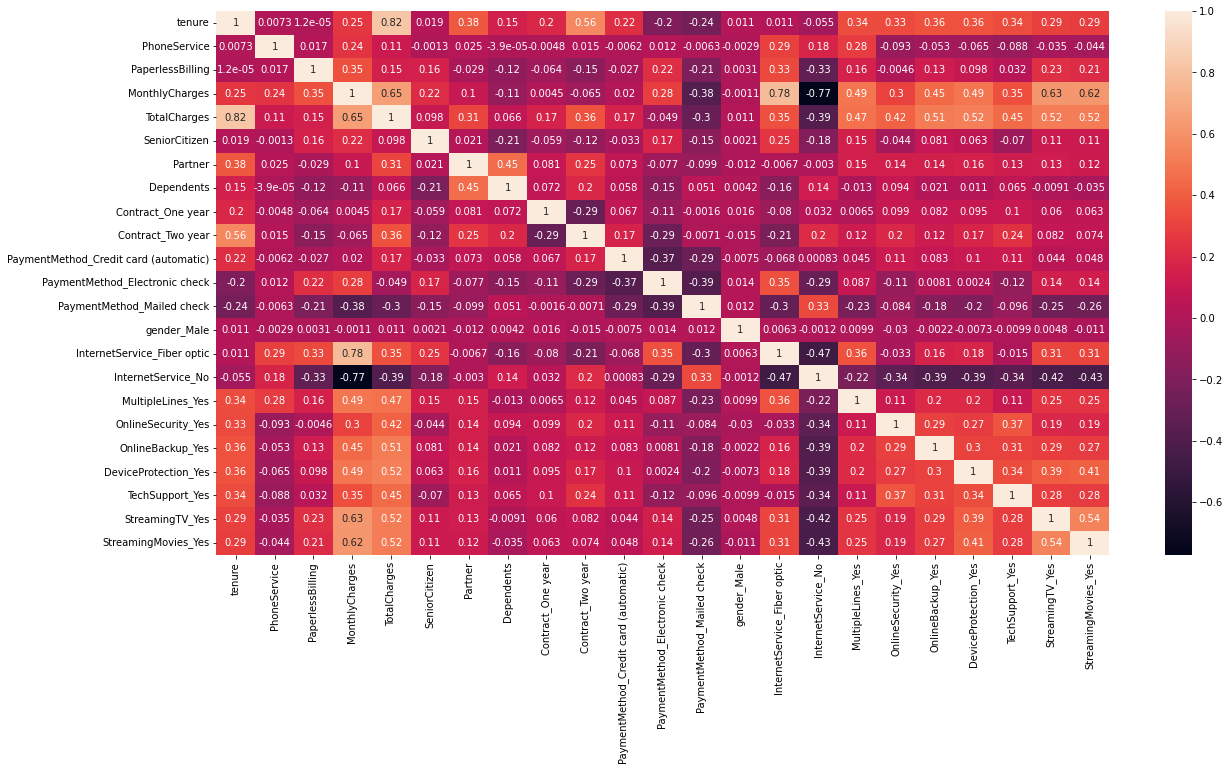

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [47]:
import statsmodels.api as sm

In [48]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.8
Date:                Wed, 29 Jun 2022   Deviance:                       4017.6
Time:                        22:39:08   Pearson chi2:                 5.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2883
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9981      1.532     -1.957      0.050      -6.001       0.005
tenure                                   -1.2939      0.175     -7.388      0.000      -1.637      -0.951
PhoneService                              0.4157      0.786      0.529      0.597      -1.125       1.957
PaperlessBilling                          0.3441      0.090      3.816      0.000       0.167       0.521
MonthlyCharges                           -1.5256      1.163     -1.312      0.189      -3.805       0.753
TotalCharges                              0.5521      0.185      2.981      0.003       0.189       0.915
SeniorCitizen                             0.2966      0.103      2.893      0.004       0.096       0.498
Partner                                   0.0258      0.094      0.275      0.783      -0.158       0.210
Dependents                               -0.2202      0.108     -2.045      0.041      -0.431      -0.009
Contract_One year                        -0.6734      0.129     -5.206      0.000      -0.927      -0.420
Contract_Two year                        -1.3312      0.207     -6.432      0.000      -1.737      -0.926
PaymentMethod_Credit card (automatic)    -0.1540      0.138     -1.115      0.265      -0.425       0.117
PaymentMethod_Electronic check            0.2719      0.114      2.382      0.017       0.048       0.496
PaymentMethod_Mailed check               -0.0895      0.139     -0.645      0.519      -0.361       0.182
gender_Male                              -0.0409      0.078     -0.521      0.602      -0.194       0.113
InternetService_Fiber optic               2.0294      0.967      2.098      0.036       0.134       3.925
InternetService_No                       -2.1743      0.978     -2.224      0.026      -4.090      -0.258
MultipleLines_Yes                         0.5565      0.215      2.589      0.010       0.135       0.978
OnlineSecurity_Yes                       -0.0417      0.217     -0.193      0.847      -0.466       0.383
OnlineBackup_Yes                         -0.0172      0.212     -0.081      0.935      -0.432       0.397
DeviceProtection_Yes                      0.2045      0.213      0.959      0.338      -0.214       0.623
TechSupport_Yes                          -0.2529      0.219     -1.155      0.248      -0.682       0.176
StreamingTV_Yes                           0.7042      0.397      1.774      0.076      -0.074       1.482
StreamingMovies_Yes                       0.6745      0.396      1.702      0.089      -0.102       1.451
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False])

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 12),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 13),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 8),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 9),
 ('gender_Male', False, 11),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 3),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 10),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 5),
 ('StreamingMovies_Yes', False, 7)]

In [60]:
col = X_train.columns[rfe.support_]

In [61]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4918
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2032.8
Date:                Wed, 29 Jun 2022   Deviance:                       4065.6
Time:                        22:41:41   Pearson chi2:                 5.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2813
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2106      0.154     -7.869      0.000      -1.512      -0.909
tenure                            -1.3877      0.167     -8.303      0.000      -1.715      -1.060
PhoneService                      -0.5787      0.154     -3.767      0.000      -0.880      -0.278
PaperlessBilling                   0.3985      0.089      4.485      0.000       0.224       0.573
TotalCharges                       0.6783      0.166      4.077      0.000       0.352       1.004
SeniorCitizen                      0.3610      0.099      3.633      0.000       0.166       0.556
Contract_One year                 -0.6993      0.127     -5.503      0.000      -0.948      -0.450
Contract_Two year                 -1.3867      0.206     -6.744      0.000      -1.790      -0.984
PaymentMethod_Electronic check     0.4015      0.082      4.872      0.000       0.240       0.563
InternetService_Fiber optic        0.9045      0.116      7.805      0.000       0.677       1.132
InternetService_No                -0.8411      0.158     -5.313      0.000      -1.151      -0.531
TechSupport_Yes                   -0.5280      0.103     -5.131      0.000      -0.730      -0.326
==================================================================================================
"""

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

877     0.037491
5792    0.519560
5334    0.080760
878     0.025511
6578    0.097773
3090    0.430532
3043    0.733525
5028    0.067128
4463    0.737146
2822    0.076883
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03749133, 0.5195602 , 0.08076033, 0.02551069, 0.09777343,
       0.43053243, 0.73352451, 0.0671276 , 0.73714637, 0.07688308])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [65]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.037491,877
1,1,0.519560,5792
2,1,0.080760,5334
3,0,0.025511,878
4,0,0.097773,6578


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [66]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final

,Churn,Churn_Prob,CustID,predicted
0,0,0.037491,877,0
1,1,0.519560,5792,1
2,1,0.080760,5334,0
3,0,0.025511,878,0
4,0,0.097773,6578,0
...,...,...,...,...
4925,0,0.018762,79,0
4926,1,0.225399,3927,0
4927,0,0.005679,5955,0
4928,1,0.710874,6936,1


In [67]:
from sklearn import metrics

In [68]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3254  373]
 [ 565  738]]


In [69]:
# Predicted     not_churn    churn
# Actual
# not_churn        3261      366
# churn            552       751

In [70]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8097363083164301


#### Checking VIFs

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.34
3,TotalCharges,6.51
0,tenure,6.14
8,InternetService_Fiber optic,3.88
6,Contract_Two year,3.03
9,InternetService_No,2.99
2,PaperlessBilling,2.63
10,TechSupport_Yes,1.99
7,PaymentMethod_Electronic check,1.87
5,Contract_One year,1.82


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [73]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'TechSupport_Yes'],
      dtype='object')

In [74]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4919
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.9
Date:                Wed, 29 Jun 2022   Deviance:                       4079.8
Time:                        22:41:54   Pearson chi2:                 5.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2793
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6023      0.116    -13.843      0.000      -1.829      -1.375
tenure                            -1.2724      0.164     -7.749      0.000      -1.594      -0.951
PaperlessBilling                   0.3985      0.089      4.499      0.000       0.225       0.572
TotalCharges                       0.5632      0.164      3.440      0.001       0.242       0.884
SeniorCitizen                      0.3830      0.099      3.860      0.000       0.188       0.577
Contract_One year                 -0.7044      0.127     -5.553      0.000      -0.953      -0.456
Contract_Two year                 -1.3790      0.205     -6.718      0.000      -1.781      -0.977
PaymentMethod_Electronic check     0.4133      0.082      5.026      0.000       0.252       0.574
InternetService_Fiber optic        0.7457      0.106      7.013      0.000       0.537       0.954
InternetService_No                -1.0283      0.149     -6.900      0.000      -1.320      -0.736
TechSupport_Yes                   -0.5339      0.103     -5.199      0.000      -0.735      -0.333
==================================================================================================
"""

In [75]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [76]:
y_train_pred[:10]

array([0.02655143, 0.52095052, 0.07744961, 0.03182253, 0.11192385,
       0.46819813, 0.65097638, 0.0644204 , 0.7380212 , 0.08968125])

In [77]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [78]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.026551,877,0
1,1,0.520951,5792,1
2,1,0.077450,5334,0
3,0,0.031823,878,0
4,0,0.111924,6578,0


In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8064908722109534


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,6.51
0,tenure,5.95
7,InternetService_Fiber optic,2.87
5,Contract_Two year,2.69
1,PaperlessBilling,2.37
8,InternetService_No,2.19
9,TechSupport_Yes,1.83
6,PaymentMethod_Electronic check,1.81
4,Contract_One year,1.63
3,SeniorCitizen,1.29


In [81]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'InternetService_No', 'TechSupport_Yes'],
      dtype='object')

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4920
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.1
Date:                Wed, 29 Jun 2022   Deviance:                       4092.2
Time:                        22:42:00   Pearson chi2:                 5.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2774
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.6289      0.114    -14.237      0.000      -1.853      -1.405
tenure                            -0.7551      0.059    -12.813      0.000      -0.871      -0.640
PaperlessBilling                   0.4038      0.088      4.567      0.000       0.230       0.577
SeniorCitizen                      0.3887      0.100      3.904      0.000       0.194       0.584
Contract_One year                 -0.6820      0.126     -5.419      0.000      -0.929      -0.435
Contract_Two year                 -1.3318      0.203     -6.558      0.000      -1.730      -0.934
PaymentMethod_Electronic check     0.4134      0.082      5.017      0.000       0.252       0.575
InternetService_Fiber optic        0.9298      0.092     10.123      0.000       0.750       1.110
InternetService_No                -1.0697      0.148     -7.250      0.000      -1.359      -0.781
TechSupport_Yes                   -0.4731      0.101     -4.673      0.000      -0.672      -0.275
==================================================================================================
"""

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.03377174, 0.53915708, 0.06859345, 0.03853317, 0.1097117 ,
       0.43581644, 0.62556709, 0.05205788, 0.74745588, 0.08592561])

In [85]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [86]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.033772,877,0
1,1,0.539157,5792,1
2,1,0.068593,5334,0
3,0,0.038533,878,0
4,0,0.109712,6578,0


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8064908722109534


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.66
1,PaperlessBilling,2.36
6,InternetService_Fiber optic,2.25
0,tenure,1.80
5,PaymentMethod_Electronic check,1.79
8,TechSupport_Yes,1.75
7,InternetService_No,1.74
3,Contract_One year,1.63
2,SeniorCitizen,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [89]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3258,  369],
       [ 585,  718]])

In [90]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [91]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8064908722109534

## Metrics beyond simply accuracy

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5510360706062931

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.8982630272952854

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10173697270471464


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.6605335786568537


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8477751756440282


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

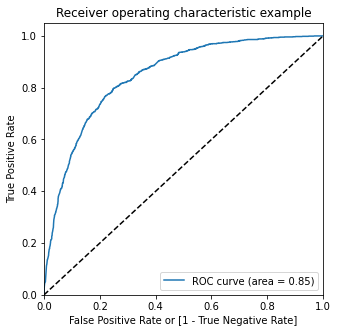

In [100]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.033772,877,0,1,0,0,0,0,0,0,0,0,0
1,1,0.539157,5792,1,1,1,1,1,1,1,0,0,0,0
2,1,0.068593,5334,0,1,0,0,0,0,0,0,0,0,0
3,0,0.038533,878,0,1,0,0,0,0,0,0,0,0,0
4,0,0.109712,6578,0,1,1,0,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.264300  1.000000  0.000000
0.1   0.1  0.608722  0.941673  0.489109
0.2   0.2  0.715010  0.854950  0.664737
0.3   0.3  0.769371  0.775902  0.767025
0.4   0.4  0.797566  0.681504  0.839261
0.5   0.5  0.806491  0.551036  0.898263
0.6   0.6  0.799391  0.400614  0.942652
0.7   0.7  0.773428  0.211051  0.975462
0.8   0.8  0.745233  0.039140  0.998897
0.9   0.9  0.735700  0.000000  1.000000


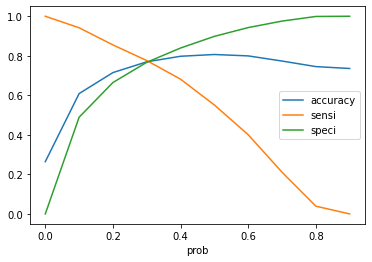

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.033772,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.539157,5792,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.068593,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.038533,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.109712,6578,0,1,1,0,0,0,0,0,0,0,0,0


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7693711967545639

In [106]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2782,  845],
       [ 292, 1011]])

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7759017651573292

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.7670250896057348

In [110]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23297491039426524


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5447198275862069


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9050097592713078


## Precision and Recall

In [113]:
#Looking at the confusion matrix again

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3258,  369],
       [ 585,  718]])

##### Precision
TP / TP + FP

In [115]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6605335786568537

##### Recall
TP / TP + FN

In [116]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5510360706062931

Using sklearn utilities for the same

In [117]:
from sklearn.metrics import precision_score, recall_score

In [118]:
#?precision_score

In [119]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6605335786568537

In [120]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5510360706062931

### Precision and recall tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 4925    0
 4926    1
 4927    0
 4928    1
 4929    1
 Name: Churn, Length: 4930, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 4925    0
 4926    0
 4927    0
 4928    1
 4929    1
 Name: predicted, Length: 4930, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

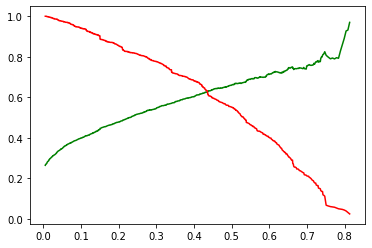

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [225]:
y_test_pred = res.predict(X_test_sm)

In [226]:
y_test_pred[:10]

4880    0.009678
1541    0.004802
1289    0.018651
5745    0.012876
4873    0.128044
4168    0.019836
1557    0.285869
2892    0.151118
664     0.007746
1588    0.256150
dtype: float64

In [227]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [228]:
# Let's see the head
y_pred_1.head()

,0
4880,0.009678
1541,0.004802
1289,0.018651
5745,0.012876
4873,0.128044


In [229]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [230]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [231]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [232]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [233]:
y_pred_final.head()

,Churn,CustID,0
0,0,4880,0.009678
1,0,1541,0.004802
2,0,1289,0.018651
3,0,5745,0.012876
4,0,4873,0.128044


In [234]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [238]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [239]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4880,0,0.009678
1,1541,0,0.004802
2,1289,0,0.018651
3,5745,0,0.012876
4,4873,0,0.128044


In [240]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [241]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,4880,0,0.009678,0
1,1541,0,0.004802,0
2,1289,0,0.018651,0
3,5745,0,0.012876,0
4,4873,0,0.128044,0


In [242]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7785139611926172

In [243]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1283,  264],
       [ 204,  362]], dtype=int64)

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [245]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6395759717314488

In [246]:
# Let us calculate specificity
TN / float(TN+FP)

0.8293471234647706